<a href="https://colab.research.google.com/github/Ianfm94/Dissertation/blob/master/Notebooks/3.%20LSTM_Basic_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Hiding warnings about package depreciations
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Importing required packages
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import array
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Softmax
from keras.layers import RepeatVector, BatchNormalization, TimeDistributed
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import LearningRateScheduler
from keras.metrics import Precision, Recall, AUC, Accuracy
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import imblearn
import keras

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# Importing files via Drive
from google.colab import  drive
drive.mount('/drive', force_remount=True)

print(tf.__version__)
print(imblearn.__version__)

Mounted at /drive
2.3.0
0.4.3


In [3]:
# Reading in training and labels data

train = pd.read_csv('/drive/My Drive/Colab Notebooks/Dissertation Workings/CSV Files/Training_Returns.csv',
  index_col = 0)
train = pd.DataFrame(train)
labels = pd.read_csv('/drive/My Drive/Colab Notebooks/Dissertation Workings/CSV Files/Training_Labels.csv',
  index_col = 0)
labels = pd.DataFrame(labels)

# In the labels file 0 = Volatility, 1 = Jump 

print(train.head(n=10))
print(train.shape)
print()
print(labels.head(n=10))
print(labels.shape)

train  = train.to_numpy()
labels  = labels.to_numpy()

np.random.seed(111)

# Splitting between train, validation and test data
x_train,x_valid,y_train,y_valid = train_test_split(train, labels,
    test_size=0.25, random_state=111)

print("Total number of training samples: ", x_train.shape)
print("Total number of validation samples: ", x_valid.shape)

n_samples_train = x_train.shape[0]
n_samples_valid = x_valid.shape[0]
n_timesteps = 2
n_timesteps_x =  x_train.shape[1]
n_timesteps_y =  y_train.shape[1]
n_features = 1

x_train = np.reshape(x_train, (n_samples_train, n_timesteps_x, n_features))
x_valid = np.reshape(x_valid, (n_samples_valid, n_timesteps_x, n_features))
y_train = np.reshape(y_train, (n_samples_train, n_timesteps_y, n_features))
y_valid = np.reshape(y_valid, (n_samples_valid, n_timesteps_y, n_features))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

          0         1         2  ...       192       193       194
0  0.712069 -0.101955 -0.013312  ...  0.071408  0.017839 -1.165454
1 -0.068878  0.114877 -0.162937  ... -0.025024 -0.050061 -1.165454
2  0.721098 -0.260756  0.295838  ...  0.104945  0.003419 -1.165454
3 -0.320183  0.401514  0.205667  ... -0.041466  0.036874 -1.165454
4 -0.298394  0.937150 -0.317115  ... -0.006872 -0.046965 -1.165454
5  0.000000  0.184489 -0.142091  ...  0.065947 -0.062494 -1.165454
6  0.112326 -0.456735  0.043264  ... -0.048078  0.008017 -1.165454
7  0.017156 -0.161235  0.250833  ...  0.066765 -0.087427 -1.165454
8 -0.228784  0.262229 -0.081520  ...  0.054676 -0.028461 -1.165454
9 -0.109659  0.196688  0.039945  ...  0.088428  0.001133 -1.165454

[10 rows x 195 columns]
(2000, 195)

   0  1  2  3  4  5  6  7  8  ...  186  187  188  189  190  191  192  193  194
0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    

In [33]:
# LSTM Workings_5

model_5 = Sequential()
model_5.add(Bidirectional(LSTM(units=200, return_sequences = True, 
                               input_shape = (n_timesteps, n_features))))
model_5.add(LSTM(100, return_sequences = True))
model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.compile(loss='binary_crossentropy', optimizer="Adam",
              metrics=(['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]))

results_5 = model_5.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

print(model_5.summary())

Epoch 1/100
47/47 [==============================] - 3s 59ms/step - loss: 0.0965 - accuracy: 0.9825 - precision: 0.0034 - recall: 0.0130 - val_loss: 0.0242 - val_accuracy: 0.9963 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
47/47 [==============================] - 2s 35ms/step - loss: 0.0245 - accuracy: 0.9963 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0244 - val_accuracy: 0.9963 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
47/47 [==============================] - 2s 35ms/step - loss: 0.0243 - accuracy: 0.9963 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0240 - val_accuracy: 0.9963 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
47/47 [==============================] - 2s 36ms/step - loss: 0.0242 - accuracy: 0.9963 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0232 - val_accuracy: 0.9963 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
47/47 [=============================

In [36]:
# Accuracy
Train_Acc = np.mean(results_5.history["accuracy"]) * 100
Train_Acc = round(Train_Acc, 2)
Valid_Acc = np.mean(results_5.history["val_accuracy"]) * 100
Valid_Acc = round(Valid_Acc, 2)
Train_Pre = np.mean(results_5.history["precision"]) * 100
Train_Pre = round(Train_Pre, 2)
Valid_Pre = np.mean(results_5.history["val_precision"]) * 100
Valid_Pre = round(Valid_Pre, 2)
Train_Rec = np.mean(results_5.history["recall"]) * 100
Train_Rec = round(Train_Rec, 2)
Valid_Rec = np.mean(results_5.history["val_recall"]) * 100
Valid_Rec = round(Valid_Rec, 2)
Train_F1 = 2 * ((Train_Pre*Train_Rec)/(Train_Pre+Train_Rec))
Train_F1 = round(Train_F1, 2)
Valid_F1 = 2 * ((Valid_Pre*Valid_Rec)/(Valid_Pre+Valid_Rec))
Valid_F1 = round(Valid_F1, 2)

print("Training-Accuracy:", Train_Acc, '%')
print("Validation-Accuracy:", Valid_Acc, '%') 
print()
print("Training-Precision:", Train_Pre, '%')
print("Validation-Precision:", Valid_Pre, '%')
print()
print("Training-Recall:", Train_Rec, '%')
print("Validation-Recall:", Valid_Rec, '%')
print()
print("Training-F1 Score:", Train_F1)
print("Validation-F1 Score:", Valid_F1)


Training-Accuracy: 99.89 %
Validation-Accuracy: 99.9 %

Training-Precision: 83.33 %
Validation-Precision: 83.69 %

Training-Recall: 76.9 %
Validation-Recall: 74.82 %

Training-F1 Score: 79.99
Validation-F1 Score: 79.01


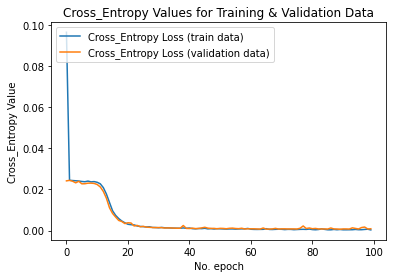

In [37]:
plt.plot(results_5.history['loss'], label='Cross_Entropy Loss (train data)')
plt.plot(results_5.history['val_loss'], label='Cross_Entropy Loss (validation data)')
plt.title('Cross_Entropy Values for Training & Validation Data')
plt.ylabel('Cross_Entropy Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

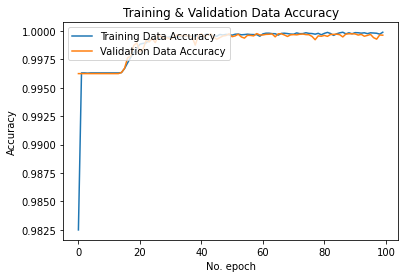

In [38]:
plt.plot(results_5.history['accuracy'], label='Training Data Accuracy')
plt.plot(results_5.history['val_accuracy'], label='Validation Data Accuracy')
plt.title('Training & Validation Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()